# Final Projects - Individual Contributions
Christina Kong

Professor Roth

CS 543: Machine Learning

May 5, 2025

# Functions

## Math Functions

In [ ]:
# Exercise 2.9 Parts A & B

# Function to use for different summations
def summation(index, equation, start=0):
  total = 0
  for y in range(start, index):
    total += equation(y)
  return total

# Using lambda to define the expressions in the summations
equationA = lambda y: y - 4
equationB = lambda y: y**2 - 5

ExerciseA = summation(6, equationA, start=0)
print("The Result for Exercise 2.9 part A:", ExerciseA)

ExerciseB = summation(7, equationB, start=2)
print("The Result for Exercise 2.9 part B:", ExerciseB)

# Function for Exercise 2.9 Part A
def summationA(index):
  total = 0
  for y in range(index):
    total += (y - 4)
  return total

#ExerciseA2 = summationA(6)
#print(ExerciseA2)

# Function for Exercise 2.9 Part B
def summationB(index, start=2):
  total = 0
  for y in range(start, index):
    total += (y**2 - 5)
  return total

#ExerciseB2 = summationB(7)
#print(ExerciseB2)

The Result for Exercise 2.9 part A: -9
The Result for Exercise 2.9 part B: 65


## Functions for the Project

### Logistic Regression Accuracy Score

In [ ]:
import numpy as np

def logisticregression_accuracyscore (y_true, y_pred):

  correct_predictions = (y_true == y_pred).sum()
  total_predictions = len(y_true)

  return (round(correct_predictions / total_predictions, 2))

# Testing function
y_true = np.array([1, 0, 1, 0, 1, 0])
y_pred = np.array([1, 0, 1, 1, 1, 1])

accuracy_score = logisticregression_accuracyscore(y_true, y_pred)
print(f"Accuracy: {accuracy_score}")

Accuracy: 0.67


### Pearson Correlation Coefficent

In [ ]:
import numpy as np

def pearson_correlation(x, y):

    x = np.asarray(x)
    y = np.asarray(y)

    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denominator = np.sqrt(np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))

    # In the case the denominator is a 0
    if denominator == 0:
        return np.nan # Not a number

    division = (numerator/denominator)

    return round(division, 2)

# Testing function
x = [1, 2, 3, 4, 5]
y = [1, 2, 4, 7, 5]

p_correlation = pearson_correlation(x, y)
print("With Function:",p_correlation)

With Function: 0.86


# Pokemon Classification Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Neccessary Libraries

In [ ]:
# Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Loading the Dataset

In [ ]:
# Loading the Pokemon dataset into a pandas DataFrame called pokemon_df
pokemon_df = pd.read_csv('/content/drive/My Drive/pokemon_dataset.csv')

# Outputting pokemon dataframe
pokemon_df

,Name,Type,Weight,Height,Wings,Arms,Legs
0,Bulbasaur,Grass,6.9,0.7,0,1,1
1,Bulbasaur,Poison,6.9,0.7,0,1,1
2,Ivysaur,Grass,13.0,1.0,0,1,1
3,Ivysaur,Poison,13.0,1.0,0,1,1
4,Venusaur,Grass,100.0,2.0,0,1,1
...,...,...,...,...,...,...,...
362,Lugia,Flying,216.0,5.2,1,0,1
363,Ho-oh,Fire,199.0,3.8,1,0,1
364,Ho-oh,Flying,199.0,3.8,1,0,1
365,Celebi,Psychic,5.0,0.6,1,1,1


In [ ]:
# Displays the number of entries and columns
pokemon_df.shape

(367, 7)

### Pokemon Dataset Info

In [ ]:
# Outputting information about the pokemon dataset including column names, data types, and more.
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    367 non-null    object 
 1   Type    367 non-null    object 
 2   Weight  367 non-null    float64
 3   Height  367 non-null    float64
 4   Wings   367 non-null    int64  
 5   Arms    367 non-null    int64  
 6   Legs    367 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 20.2+ KB


Note to Self: Height - meters, Weight - kilograms

## Data Cleaning and Preprocessing

### Checking and Handling Missing Values

In [ ]:
# Handling missing values

# Counting for any missing values within the pokemon dataset
pokemon_df.isna().sum()

,0
Name,0
Type,0
Weight,0
Height,0
Wings,0
Arms,0
Legs,0


In [ ]:
# Output the entries that are NA specifically in the 'Legs' column
pokemon_df[pokemon_df["Legs"].isna() ]

,Name,Type,Weight,Height,Wings,Arms,Legs


In [ ]:
# To deal with the missing value for the column 'Legs', I will replace "NaN" with 0 to represent the Pokemon in question has no legs
pokemon_df["Legs"] = pokemon_df["Legs"].fillna(0)

# Selecting Dugtrio row to make sure there is no longer a missing value
# Look up the pokemon by name
dugtrio_name = 'Dugtrio'
dugtrio = pokemon_df[pokemon_df['Name'] == dugtrio_name]

# Printing dugtrio row
print(dugtrio)

       Name    Type  Weight  Height  Wings  Arms  Legs
76  Dugtrio  Ground    33.3     0.7      0     0     0


### Converting a column from a Float datatype to an Integer datatype

In [ ]:
# Changing the column 'Legs' from float to int
pokemon_df['Legs'] = pokemon_df['Legs'].astype(int)

# Checking datatypes after change
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    367 non-null    object 
 1   Type    367 non-null    object 
 2   Weight  367 non-null    float64
 3   Height  367 non-null    float64
 4   Wings   367 non-null    int64  
 5   Arms    367 non-null    int64  
 6   Legs    367 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 20.2+ KB


In [ ]:
# Counting for any missing values within the pokemon dataset again
pokemon_df.isna().sum()

,0
Name,0
Type,0
Weight,0
Height,0
Wings,0
Arms,0
Legs,0


### Checking for Misspelling

In [ ]:
# Checking for misspelling in the 'Type' column of the pokemon dataset using unique()
type_unique_values = pokemon_df['Type'].unique()

# Output Types
print(type_unique_values)


['Grass' 'Poison' 'Fire' 'Flying' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Steel' 'Ice' 'Ghost'
 'Electic' 'Dragon' 'Dark']


### Handling Misspelling

In [ ]:
pokemon_df['Type'] = pokemon_df['Type'].replace({'Electic': 'Electric'})

# Checking for misspelling in the 'Type' column of the pokemon dataset using unique() again
type_unique_values = pokemon_df['Type'].unique()

# Output Types
print(type_unique_values)

['Grass' 'Poison' 'Fire' 'Flying' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Steel' 'Ice' 'Ghost'
 'Dragon' 'Dark']


In [ ]:
# Checking for misspelling in the 'Name' column of the pokemon dataset using unique()
name_unique_values = pokemon_df['Name'].unique()

# Output Types
print(name_unique_values)

['Bulbasaur' 'Ivysaur' 'Venusaur' 'Charmander' 'Charmeleon' 'Charizard'
 'Squirtle' 'Wartortle' 'Blastoise' 'Caterpie' 'Metapod' 'Butterfree'
 'Weedle' 'Kakuna' 'Beedrill' 'Pidgey' 'Pidgeotto' 'Pidgeot' 'Rattata'
 'Raticate' 'Spearow' 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu'
 'Sandshrew' 'Sandslash' 'Nidoran♀' 'Nidorina' 'Nidoqueen' 'Nidoran♂'
 'Nidorino' 'Nidoking' 'Clefairy' 'Clefable' 'Vulpix' 'Ninetales'
 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat' 'Oddish' 'Gloom' 'Vileplume'
 'Paras' 'Parasect' 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth'
 'Persian' 'Psyduck' 'Golduck' 'Mankey' 'Primeape' 'Growlithe' 'Arcanine'
 'Poliwag' 'Poliwhirl' 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'Machop'
 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel' 'Tentacool'
 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash' 'Slowpoke'
 'Slowbro' 'Magnemite' 'Magneton' "Farfetch'd" 'Doduo' 'Dodrio' 'Seel'
 'Dewgong' 'Grimer' 'Muk' 'Shelder' 'Cloyster' 'Gastly' 'Haunter' 'Gengar'
 'On

### Convert Categorical Variables to Numerical Using One-Hot Encoding

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
# I chose to convert the 'Type' column from categorical to numerical

pokemon_encoded = pd.get_dummies(pokemon_df, columns=['Type'])

# Verify the encoded column names
for i in pokemon_encoded.columns:
  print(i)

Name
Weight
Height
Wings
Arms
Legs
Type_Bug
Type_Dark
Type_Dragon
Type_Electric
Type_Fairy
Type_Fighting
Type_Fire
Type_Flying
Type_Ghost
Type_Grass
Type_Ground
Type_Ice
Type_Normal
Type_Poison
Type_Psychic
Type_Rock
Type_Steel
Type_Water


## Data Analysis

## Calculate and Display Basic Statistics

### Counting Number of Pokemon for Each Type

In [ ]:
# Counting the number of pokemon for each type
type_count = pokemon_df['Type'].value_counts()
print(type_count)

Type
Water       50
Flying      39
Poison      38
Normal      36
Grass       24
Ground      24
Psychic     24
Fire        22
Bug         21
Rock        18
Electric    17
Fairy       13
Fighting    11
Ice         10
Steel        6
Dark         6
Ghost        4
Dragon       4
Name: count, dtype: int64


### 'Weight' Column Statistics

In [ ]:
# Statistics for the 'Weight' column of the Pokemon dataset
weight_desc = pokemon_df['Weight'].describe()
print(weight_desc)

# Looking up the Pokemon with the Highest Weight
max_weight = pokemon_df['Weight'].idxmax()
max_weight_pokemon = pokemon_df.loc[max_weight, 'Name']
print("\nPokemon with Max Weight:", max_weight_pokemon, "-", max_weight)

# Looking up the Pokemon with the Lowest Weight
min_weight = pokemon_df['Weight'].idxmin()
min_weight_pokemon = pokemon_df.loc[min_weight, 'Name']
print("\nPokemon with Min Weight:", min_weight_pokemon, "-",min_weight)

count    367.000000
mean      50.167302
std       64.333636
min        0.100000
25%        8.600000
50%       30.000000
75%       60.000000
max      460.000000
Name: Weight, dtype: float64

Pokemon with Max Weight: Snorlax - 205

Pokemon with Min Weight: Gastly - 135


### 'Height' Column Statistics

In [ ]:
# Statistics for the 'Height' column of the Pokemon dataset
height_desc = pokemon_df['Height'].describe()
print(height_desc)

# Looking up the Pokemon with the Highest Weight
max_height = pokemon_df['Height'].idxmax()
max_height_pokemon = pokemon_df.loc[max_height, 'Name']
print("\nPokemon with Max Height:", max_height_pokemon, "-", max_height)

# Looking up the Pokemon with the Lowest Weight
min_height = pokemon_df['Height'].idxmin()
min_height_pokemon = pokemon_df.loc[min_height, 'Name']
print("\nPokemon with Min Height:", min_height_pokemon, "-",min_height)

count    367.000000
mean       1.234332
std        1.120801
min        0.200000
25%        0.600000
50%        1.000000
75%        1.500000
max        9.200000
Name: Height, dtype: float64

Pokemon with Max Height: Steelix - 300

Pokemon with Min Height: Diglett - 75


### Counting Number of Pokemon That Has or Does Not Have Wings

In [ ]:
# Counting number of pokemon who have wings and do not have wings
tails_yes = (pokemon_df['Wings'] == 1).sum()
print("Number of Pokemon With Wings", tails_yes)

tails_no = (pokemon_df['Wings'] == 0).sum()
print("Number of Pokemon Without Wings", tails_no)

Number of Pokemon With Wings 71
Number of Pokemon Without Wings 296


### Counting Number of Pokemon That Has Arms or Does Not Have Arms

In [ ]:
# Counting number of pokemon who have wings and do not have wings
arms_yes = (pokemon_df['Arms'] == 1).sum()
print("Number of Pokemon With Arms", arms_yes)

arms_no = (pokemon_df['Arms'] == 0).sum()
print("Number of Pokemon Without Arms", arms_no)

Number of Pokemon With Arms 198
Number of Pokemon Without Arms 169


### Counting Number of Pokemon That Has Legs or Does Not Have Legs

In [ ]:
# Counting number of pokemon who have wings and do not have wings
legs_yes = (pokemon_df['Legs'] == 1).sum()
print("Number of Pokemon With Legs", legs_yes)

legs_no = (pokemon_df['Legs'] == 0).sum()
print("Number of Pokemon Without Legs", legs_no)

Number of Pokemon With Legs 281
Number of Pokemon Without Legs 86


## Group the data by different features to find correlations.

### Counting Pokemon with Wings Based on Type

In [ ]:
# Displaying number of pokemon with wings based on type
Wing_Count = pokemon_df.groupby('Type')['Wings'].sum()
Wing_Count

,Wings
Type,
Bug,7
Dark,1
Dragon,1
Electric,1
Fairy,1
Fighting,1
Fire,3
Flying,33
Ghost,0


### Counting Pokemon with Arms Based on Type

In [ ]:
# Displaying number of pokemon with arms based on type
Arms_Count = pokemon_df.groupby('Type')['Arms'].sum()
Arms_Count

,Arms
Type,
Bug,11
Dark,2
Dragon,1
Electric,10
Fairy,13
Fighting,11
Fire,15
Flying,11
Ghost,1


### Counting Pokemon with Legs Based on Type

In [ ]:
# Displaying number of pokemon with arms based on type
Legs_Count = pokemon_df.groupby('Type')['Legs'].sum()
Legs_Count

,Legs
Type,
Bug,18
Dark,6
Dragon,1
Electric,12
Fairy,13
Fighting,11
Fire,20
Flying,35
Ghost,1


### Average Height for Each Pokemon Type

In [ ]:
# Displaying average height for each pokemon type
Height_Mean = pokemon_df.groupby('Type')["Height"].mean()
Height_Mean

,Height
Type,
Bug,0.995238
Dark,1.066667
Dragon,2.450000
Electric,0.882353
Fairy,0.723077
Fighting,1.200000
Fire,1.263636
Flying,1.494872
Ghost,1.275000


### Average Weight for Each Pokemon Type

In [ ]:
# Displaying average weight for each pokemon type
Weight_Mean = pokemon_df.groupby('Type')["Weight"].mean()
Weight_Mean

,Weight
Type,
Bug,34.180952
Dark,50.816667
Dragon,95.450000
Electric,35.688235
Fairy,17.053846
Fighting,50.636364
Fire,56.222727
Flying,55.897436
Ghost,10.425000


### Using Pearson Coefficient Correlation

In [ ]:
# Finding the correlation between a pokemon's weight and height by computing the Pearson correlation coefficient.
x = pokemon_df['Weight']
y = pokemon_df['Height']

weight_height = pearson_correlation(x, y)
print("Pearson Correlation Coefficient:", weight_height)

Pearson Correlation Coefficient: 0.72


In [ ]:
# Finding the correlation between a pokemon's flying typing and wings by computing the Pearson correlation coefficient.
x = pokemon_encoded['Type_Flying']
y = pokemon_df['Wings']

flying_wings = pearson_correlation(x, y)
print("Pearson Correlation Coefficient:", flying_wings)

Pearson Correlation Coefficient: 0.57


In [ ]:
# Finding the correlation between a pokemon's flying typing and wings by computing the Pearson correlation coefficient.
x = pokemon_encoded['Type_Normal']
y = pokemon_df['Legs']

normal_legs = pearson_correlation(x, y)
print("Pearson Correlation Coefficient:", normal_legs)

Pearson Correlation Coefficient: 0.14


## Data Visualizations

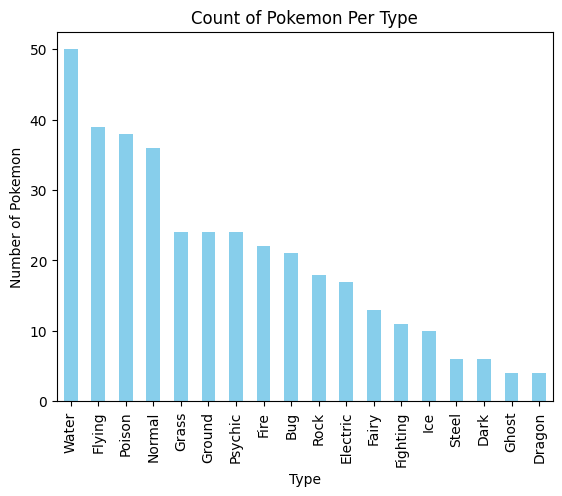

In [ ]:
# Plotting the count of Pokemon Per Typing

type_count.plot(kind='bar', color = 'skyblue')

plt.xlabel('Type')
plt.ylabel('Number of Pokemon')
plt.title('Count of Pokemon Per Type')

plt.show()

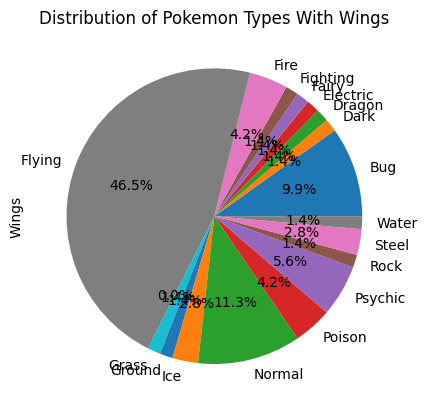

In [ ]:
# Plot value counts of pokemon types with wings as a pie chart
Wing_Count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Pokemon Types With Wings')

# Display the plot
plt.show()

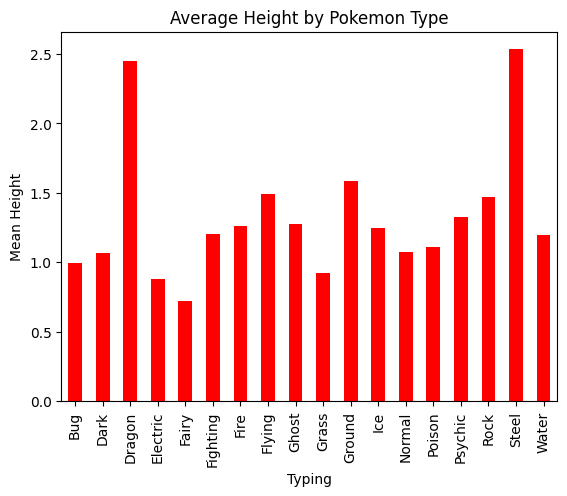

In [ ]:
# Plot the average height for each Pokemon typing
Height_Mean.plot(kind='bar', color ='red')
plt.title('Average Height by Pokemon Type')
plt.xlabel('Typing')
plt.ylabel('Mean Height')

# Display the plot
plt.show()

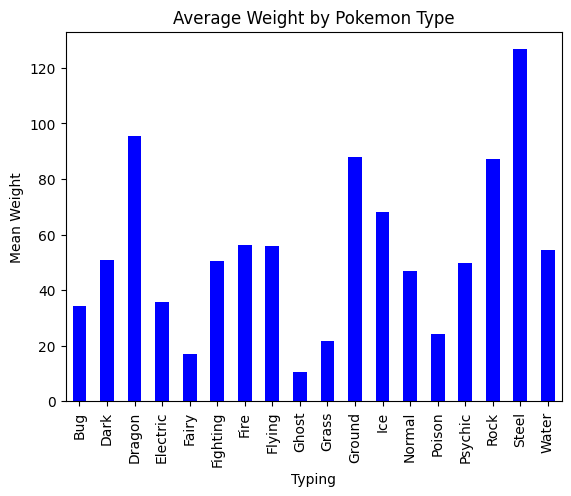

In [ ]:
# Plot the average weight for each Pokemon typing
Weight_Mean.plot(kind='bar', color ='blue')
plt.title('Average Weight by Pokemon Type')
plt.xlabel('Typing')
plt.ylabel('Mean Weight')

# Display the plot
plt.show()

## Logistic Regression Analysis


In [ ]:
# Importing libraries for logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

### Predicting Pokemon's Type

Accuracy: 0.11



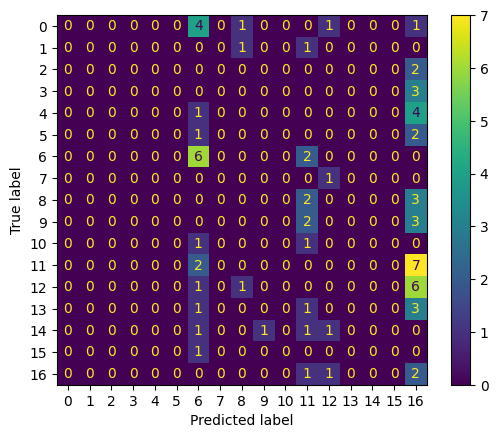


   Feature  Coefficient
4    Legs     0.473093
2   Wings     0.330243
0  Weight     0.003353
1  Height    -0.204747
3    Arms    -0.352401


In [ ]:
# Selected features
features = ['Weight', 'Height', 'Wings', 'Arms', 'Legs']
# Predicting the pokemon's type based on the selected features
target = 'Type'

X = pokemon_df[features]
y = pokemon_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
# Accuracy Score
accuracy = logisticregression_accuracyscore(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")


# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Display feature importance using coefficients

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print("\n", feature_importance.sort_values(by='Coefficient', ascending=False))


### Predicting a Specific Type

Accuracy: 0.95



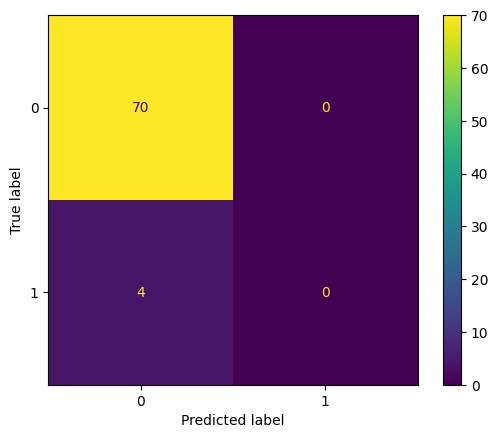


   Feature  Coefficient
3    Arms     0.585772
0  Weight     0.002088
1  Height    -0.132090
4    Legs    -0.879765
2   Wings    -1.258418


In [ ]:
# Selected features
features = ['Weight', 'Height', 'Wings', 'Arms', 'Legs']
# Predicting the pokemon's type based on the selected features
target = 'Type_Water'

X = pokemon_df[features]
y = pokemon_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
# Accuracy Score
accuracy = logisticregression_accuracyscore(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Display feature importance using coefficients

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print("\n", feature_importance.sort_values(by='Coefficient', ascending=False))
